In [178]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

#**Data Exploration and Preprocessing**

In [179]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Extract features and target variable
X = diabetes.data
y_target = diabetes.target

# Create a DataFrame and Add the target variable as a new column
data = pd.DataFrame(X, columns=diabetes.feature_names)
data['Diabetes Progression'] = y_target

In [180]:
# explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  Diabetes Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [181]:
# Create a binary target variable
# where values above the mean of the the data target are 1, and others are 0
threshold = data['Diabetes Progression'].mean()

y = (y_target > threshold).astype(int)
data['Binary target'] = y

In [182]:
# Display theِ first 10 rows of the dataset
data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression,Binary target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0,1


In [183]:
# Calculate basic statistics
statistics = data.describe().rename(index={'50%': 'median'})
statistics

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression,Binary target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484,0.441176
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005,0.497090
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000,0.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000,0.000000
median,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000,0.000000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000,1.000000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000,1.000000


#**visualizations**

##scatter plot

BMI or Body Mass Index:

is a measure used to assess whether a person has a healthy body weight for a given height.

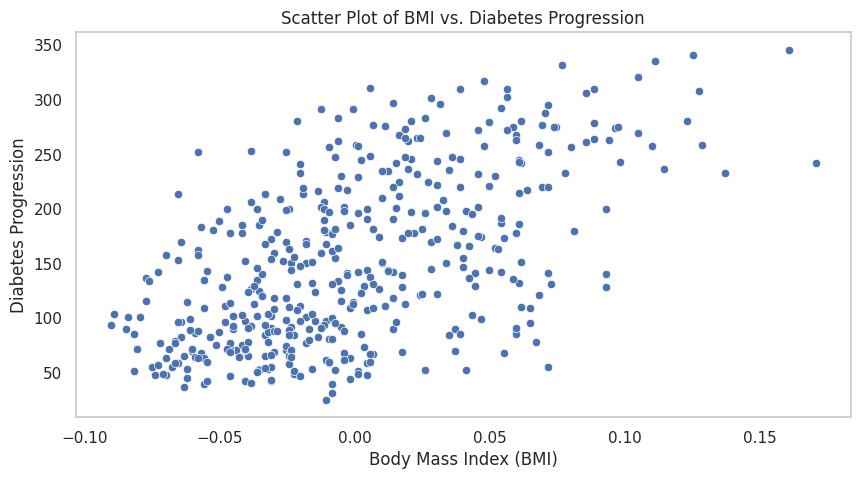

In [184]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='bmi', y='Diabetes Progression')
plt.title('Scatter Plot of BMI vs. Diabetes Progression')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression')
plt.grid()
plt.show()

 the likelihood of developing diabetes increases with a higher BMI.

 Elevated BMI is often associated with excess body fat, particularly around the abdomen,

  which can lead to insulin resistance—a key factor in the development of diabetes.

##histogram

the histogram provides valuable insights into the distribution of the target variable

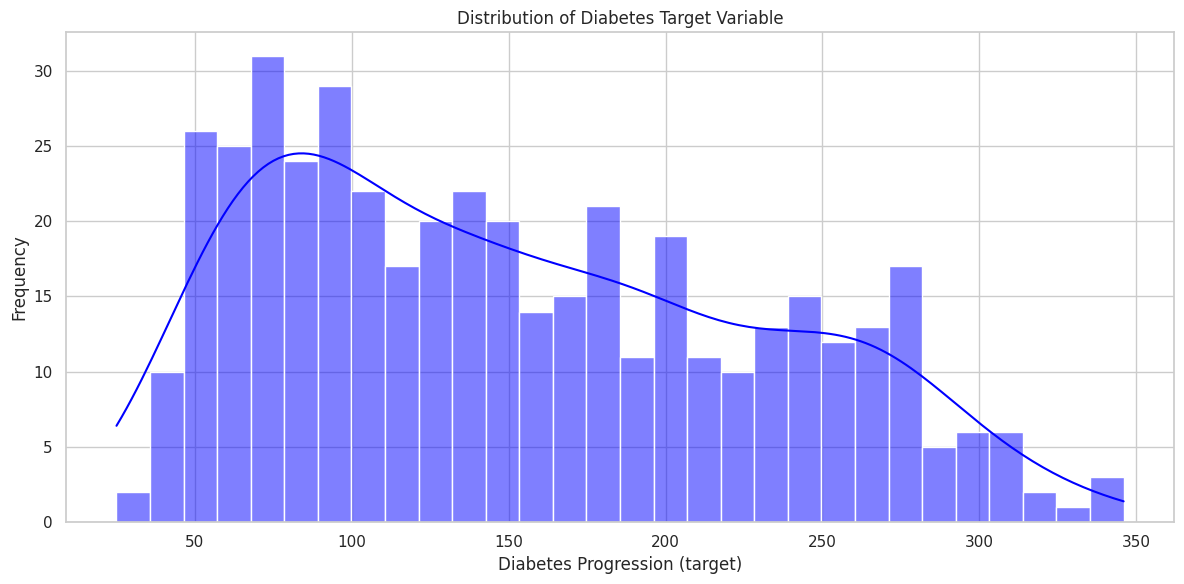

In [185]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a histogram for the target variable
plt.figure(figsize=(12, 6))
sns.histplot(data['Diabetes Progression'], bins=30, kde=True, color='blue')
plt.title('Distribution of Diabetes Target Variable')
plt.xlabel('Diabetes Progression (target)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

 indicates how many individuals in the dataset have a specific range of diabetes progression. This helps to identify whether most of the data points cluster around certain values or if they are spread out.

#**Model Selection Using Cross-Validation for Classification**

In [186]:
# Split the dataset 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
# Perform cross-validation and evaluate the model's performance using accuracy as the scoring metric
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# K-Nearest Neighbors
knn = KNeighborsClassifier()
# Perform cross-validation and evaluate the model's performance using accuracy as the scoring metric
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression 5-fold accuracy:", log_reg_scores.mean())
print("KNN 5-fold accuracy:", knn_scores.mean())


Logistic Regression 5-fold accuracy: 0.7311066398390341
KNN 5-fold accuracy: 0.6998390342052313


In [188]:
# training models on the training set
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Metrics for Logistic Regression
print("Logistic Regression Precision:", precision_score(y_test, y_pred_log_reg)) # Calculate and print the precision score for the Logistic Regression model
print("Logistic Regression Recall:", recall_score(y_test, y_pred_log_reg)) # Calculate and print the recall score for the Logistic Regression model
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log_reg)) # Calculate and print the F1 score for the Logistic Regression model
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_log_reg)) # Calculate and print the accuracy for the Logistic Regression model

# Logistic Regression ROC-AUC
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Get the probability of class 1 (positive class)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print("Logistic Regression ROC-AUC:", roc_auc_log_reg)



# Similarly calculate metrics for KNN
print("KNN Precision:", precision_score(y_test, y_pred_knn)) # Calculate and print the precision score for the KNN model
print("KNN Recall:", recall_score(y_test, y_pred_knn)) # Calculate and print the recall score for the KNN model
print("KNN F1 Score:", f1_score(y_test, y_pred_knn)) # Calculate and print the F1 score for the KNN model
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn)) # Calculate and print the accuracy for the KNN model

# KNN ROC-AUC
y_prob_knn = knn.predict_proba(X_test)[:, 1]  # Get the probability of class 1 (positive class)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print("KNN ROC-AUC:", roc_auc_knn)



Logistic Regression Precision: 0.95
Logistic Regression Recall: 0.48717948717948717
Logistic Regression F1 Score: 0.6440677966101694
Logistic Regression accuracy: 0.7640449438202247
Logistic Regression ROC-AUC: 0.8174358974358974
KNN Precision: 0.7407407407407407
KNN Recall: 0.5128205128205128
KNN F1 Score: 0.6060606060606061
KNN accuracy: 0.7078651685393258
KNN ROC-AUC: 0.7476923076923077


##**Visualization of performance comparison**

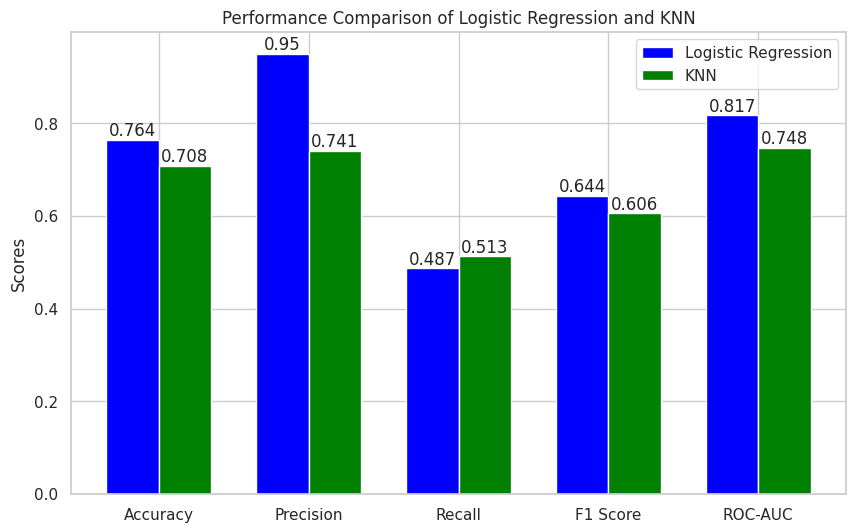

In [189]:
# Metrics for Logistic Regression
metrics_log_reg = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg, average='binary'),
    'Recall': recall_score(y_test, y_pred_log_reg, average='binary'),
    'F1 Score': f1_score(y_test, y_pred_log_reg, average='binary'),
    'ROC-AUC': roc_auc_log_reg
}

# Metrics for KNN
metrics_knn = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='binary'),
    'Recall': recall_score(y_test, y_pred_knn, average='binary'),
    'F1 Score': f1_score(y_test, y_pred_knn, average='binary'),
    'ROC-AUC': roc_auc_knn
}

# Bar plot for comparison
labels = list(metrics_log_reg.keys())  # Metric names (Accuracy, Precision, etc.)
log_reg_scores = list(metrics_log_reg.values())  # Logistic Regression scores
knn_scores = list(metrics_knn.values())  # KNN scores

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each model's performance
bars_log_reg = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression', color='blue')
bars_knn = ax.bar(x + width/2, knn_scores, width, label='KNN', color='green')

# Add labels, title, and custom ticks
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Logistic Regression and KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of bars
for bar in bars_log_reg + bars_knn:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()


#Best Model: **Logistic Regression**
Based on the cross-validation results Logistic Regression is the best model as it has the highest overall accuracy, precision, F1 scores and ROC-AUC.

however, recall is lower for Logistic Regression. This means it is missing a significant number of positive instances compared to KNN.

#**Hyperparameter Tuning with Cross-Validation**

In [190]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Different solvers to handle optimization
}

# Initialize the GridSearchCV with Logistic Regression and 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [191]:
# Retrieve the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the test data
y_pred_tuned = best_model.predict(X_test)

# Performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='binary')
recall_tuned = recall_score(y_test, y_pred_tuned, average='binary')
f1_tuned = f1_score(y_test, y_pred_tuned, average='binary')

# Display the performance of the tuned model
print("Tuned Model Accuracy:", accuracy_tuned)
print("Tuned Model Precision:", precision_tuned)
print("Tuned Model Recall:", recall_tuned)
print("Tuned Model F1 Score:", f1_tuned)

Tuned Model Accuracy: 0.7191011235955056
Tuned Model Precision: 0.7333333333333333
Tuned Model Recall: 0.5641025641025641
Tuned Model F1 Score: 0.6376811594202898


In [192]:
# Performance of the model before tuning (from previous model results)
accuracy_untuned = accuracy_score(y_test, y_pred_log_reg)
precision_untuned = precision_score(y_test, y_pred_log_reg, average='binary')
recall_untuned = recall_score(y_test, y_pred_log_reg, average='binary')
f1_untuned = f1_score(y_test, y_pred_log_reg, average='binary')

# Compare the metrics before and after tuning
print("\nPerformance Before Tuning:")
print(f"Accuracy: {accuracy_untuned}, Precision: {precision_untuned}, Recall: {recall_untuned}, F1 Score: {f1_untuned}")

print("\nPerformance After Tuning:")
print(f"Accuracy: {accuracy_tuned}, Precision: {precision_tuned}, Recall: {recall_tuned}, F1 Score: {f1_tuned}")



Performance Before Tuning:
Accuracy: 0.7640449438202247, Precision: 0.95, Recall: 0.48717948717948717, F1 Score: 0.6440677966101694

Performance After Tuning:
Accuracy: 0.7191011235955056, Precision: 0.7333333333333333, Recall: 0.5641025641025641, F1 Score: 0.6376811594202898


#**Plot the performance metrics with 80-20 split**

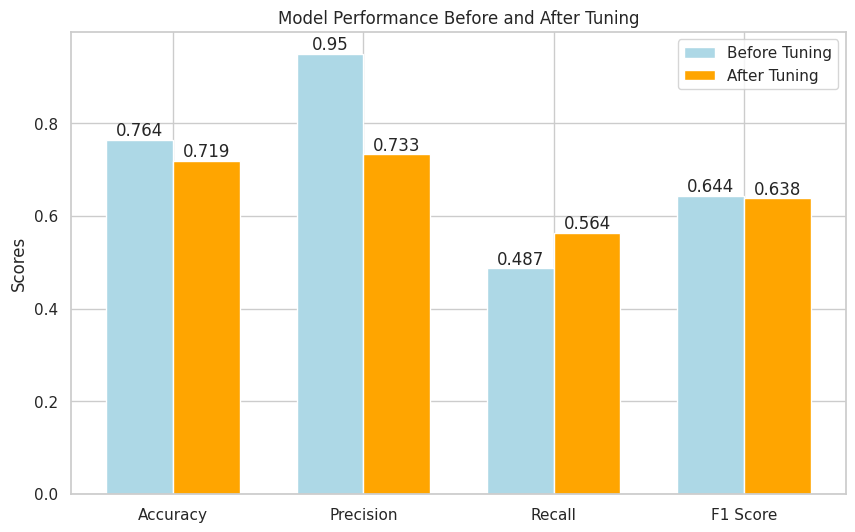

In [193]:
# Define the metrics before and after tuning
metrics_before_tuning = [accuracy_untuned, precision_untuned, recall_untuned, f1_untuned]
metrics_after_tuning = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))  # Label locations
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for performance before and after tuning
bars_before = ax.bar(x - width/2, metrics_before_tuning, width, label='Before Tuning', color='lightblue')
bars_after = ax.bar(x + width/2, metrics_after_tuning, width, label='After Tuning', color='orange')

# Add labels, title, and custom ticks
ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Display the values on top of bars
for bar in bars_before + bars_after:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()


#**70-30 data split**

it is possible that the accuracy after hyperparameter tuning could be lower than the accuracy before tuning

One of the reasons for this case to occur is **Overfitting**

After searching, it turned out that splits like 70-30 allow for a better balance between training and evaluation, ensuring that the model is learning more effectively, not overfitting to a small test set

which is particularly crucial when tuning hyperparameters​

In [194]:
# Split the dataset into 70% for training and 30% for testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Initialize the GridSearchCV with Logistic Regression and 5-fold cross-validation
grid_search_7030 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search_7030.fit(X_train_70, y_train_70)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Logistic Regression:", grid_search_7030.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [196]:
# Retrieve the best estimator (model with the best hyperparameters)
best_model_7030 = grid_search_7030.best_estimator_

# Evaluate the tuned model on the test data
y_pred_tuned_30 = best_model_7030.predict(X_test_30)

# Calculate performance metrics for the tuned model
accuracy_tuned_7030 = accuracy_score(y_test_30, y_pred_tuned_30)
precision_tuned_7030 = precision_score(y_test_30, y_pred_tuned_30, average='binary')
recall_tuned_7030 = recall_score(y_test_30, y_pred_tuned_30, average='binary')
f1_tuned_7030 = f1_score(y_test_30, y_pred_tuned_30, average='binary')

# Performance of the model before tuning (using Logistic Regression)
log_reg_7030 = LogisticRegression(max_iter=1000)
# Fit the untuned Logistic Regression model on the training data 70%
log_reg_7030.fit(X_train_70, y_train_70)
# Make predictions using the untuned model on the test data 30%
y_pred_untuned = log_reg_7030.predict(X_test_30)

# Calculate performance metrics for the untuned model
accuracy_untuned_7030 = accuracy_score(y_test_30, y_pred_untuned)
precision_untuned_7030 = precision_score(y_test_30, y_pred_untuned, average='binary')
recall_untuned_7030 = recall_score(y_test_30, y_pred_untuned, average='binary')
f1_untuned_7030 = f1_score(y_test_30, y_pred_untuned, average='binary')

#**Plot the performance metrics with 70-30 split**

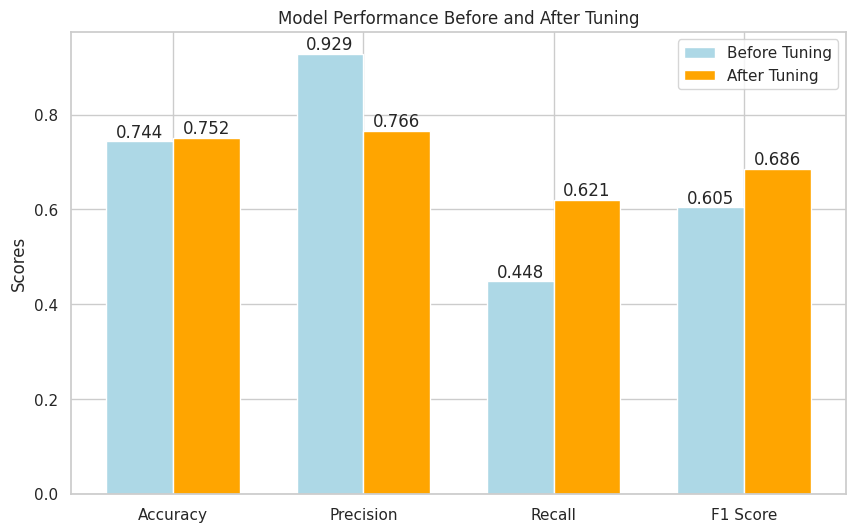

In [197]:
# Define the metrics before and after tuning
metrics_before_tuning = [accuracy_untuned_7030, precision_untuned_7030, recall_untuned_7030, f1_untuned_7030]
metrics_after_tuning = [accuracy_tuned_7030, precision_tuned_7030, recall_tuned_7030, f1_tuned_7030]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))  # Label locations
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for performance before and after tuning
bars_before = ax.bar(x - width/2, metrics_before_tuning, width, label='Before Tuning', color='lightblue')
bars_after = ax.bar(x + width/2, metrics_after_tuning, width, label='After Tuning', color='orange')

# Add labels, title, and custom ticks
ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Display the values on top of bars
for bar in bars_before + bars_after:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()


It turns out that changing the split ratio into 70-30 actually increases the accuracy of tuning hyperparameters.